#NOTE : If you want accuracy plots of iris data. run 'importing iris data cell' only before running svm functions. like wise for landsat data set

#Importing Iris data set

In [6]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/RanjithKalingeri/housing-price-/main/Iris.csv'
df = pd.read_csv(url)

df = df.sample(frac = 1)

#print(df)
data_raw = df.to_numpy()
#print (data)

def refine_data (data): 
    for i in range(data.shape[0]): 
        if data[i][5] == 'Iris-setosa':
            data[i][5] = 1
        elif data[i][5] == 'Iris-versicolor':
            data[i][5] = -1
        elif data[i][5] == 'Iris-virginica':
            data[i][5] = -1
    data = np.delete(data,[0],1)
    return data

data_iris = refine_data(data_raw)


X_total = np.delete(data_iris, 4, 1)
y_total = np.delete(data_iris, [0,1,2,3], 1)



y = y_total[0:105]
X = X_total[0:105]

y = y.astype(float)
X = X.astype(float)


y_train = y_total[105:150]
X_train = X_total[105:150]

y_train = y_train.astype(float)
X_train = X_train.astype(float)




print(X[0:10])

[[5.7 2.9 4.2 1.3]
 [5.5 2.3 4.  1.3]
 [5.6 2.5 3.9 1.1]
 [5.  3.6 1.4 0.2]
 [5.9 3.  4.2 1.5]
 [6.  2.9 4.5 1.5]
 [6.6 2.9 4.6 1.3]
 [4.3 3.  1.1 0.1]
 [7.3 2.9 6.3 1.8]
 [7.7 3.  6.1 2.3]]


#importing landsat Dataset 

In [4]:
url = 'https://raw.githubusercontent.com/RanjithKalingeri/housing-price-/main/satimage_csv.csv'

df = pd.read_csv(url)
df = df.sample(frac = 1)
data_raw = df.to_numpy()
print(data_raw[1][36])
print(data_raw.shape[0])


def refine_data_sat (data): 
    for i in range(data.shape[0]): 
        #print(i)
        if data[i][36] == 1:
            data[i][36] = 1
        elif data[i][36] == 2:
            data[i][36] = -1
        elif data[i][36] == 3:
            data[i][36] = -1
        elif data[i][36] == 4:
            data[i][36] = -1
        elif data[i][36] == 5:
            data[i][36] = -1
        elif data[i][36] == 6:
            data[i][36] = -1
        elif data[i][36] == 7:
            data[i][36] = -1
    return data

data_raw = refine_data_sat (data_raw)
#print(data_raw)
#data_raw = data_raw[data_raw[:,-1].argsort()]

data_raw = data_raw[0:6430]
#print(data_raw)

X_total = np.delete(data_raw, 36, 1)
y_total = np.delete(data_raw, range(36), 1)

y = y_total[0:4501]
X = X_total[0:4501]

y = y.astype(float)
X = X.astype(float)


y_train = y_total[4501:6430]
X_train = X_total[4501:6430]

y_train = y_train.astype(float)
X_train = X_train.astype(float)


7.0
6430


##SVM - poly kernel

     pcost       dcost       gap    pres   dres
 0: -9.9048e+01 -2.2168e+02  1e+02  1e-15  2e+00
 1: -2.2206e+02 -2.2481e+02  3e+00  4e-15  1e+00
 2: -1.8196e+04 -1.8198e+04  2e+00  3e-13  1e+00
 3: -1.4553e+08 -1.4553e+08  2e+02  6e-09  1e+00
 4: -1.5165e+11 -1.5165e+11  2e+05  3e-06  1e+00
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres
 0: -8.4835e+00 -1.4924e+01  3e+02  2e+01  2e+00
 1: -4.4481e+00 -3.0132e+00  5e+01  3e+00  2e-01
 2: -6.4974e-01 -1.5473e+00  4e+00  2e-01  2e-02
 3: -4.5989e-01 -8.8709e-01  5e-01  7e-03  6e-04
 4: -5.6545e-01 -7.6182e-01  2e-01  3e-03  3e-04
 5: -6.6336e-01 -7.6867e-01  1e-01  4e-16  8e-15
 6: -7.4399e-01 -7.4865e-01  5e-03  1e-16  1e-14
 7: -7.4799e-01 -7.4806e-01  7e-05  3e-16  9e-15
 8: -7.4806e-01 -7.4806e-01  9e-07  3e-16  9e-15
 9: -7.4806e-01 -7.4806e-01  9e-09  2e-16  9e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3234e+00 -4.0543e+00  2e+02  1e+01  1e+00
 1: -1.2423e+0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


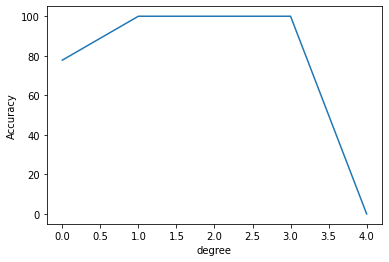

In [16]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt


def accuracy ( testset, predicted):
    testset1 = testset.reshape(1,-1)
    testset1 = testset1[0]
    #print(testset1)
    correct =0
    for x in range(len(testset1)):
        if testset[x] == predicted[x]:
            correct += 1
        #print(repr(correct))
        #print(len(testset))
    return ((correct)/(len(testset))) * 100


def poly_kernel(x, z, degree, intercept):
        return np.power(np.matmul(x, z.T) + intercept, degree)

def gaussian_kernel(x, z, sigma):
    n = x.shape[0]
    m = z.shape[0]
    xx = np.dot(np.sum(np.power(x, 2), 1).reshape(n, 1), np.ones((1, m)))
    zz = np.dot(np.sum(np.power(z, 2), 1).reshape(m, 1), np.ones((1, n)))     
    return np.exp(-(xx + zz.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

def linear_kernel(x, z):
    return np.matmul(x, z.T)


def main_poly(degreee):
    m, n = X.shape
    K = poly_kernel(X, X,degreee, intercept = 1)
    P = matrix(np.matmul(y,y.T) * K)
    q = matrix(np.ones((m, 1)) * -1)
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))          
    G = matrix(np.eye(m) * -1)
    h = matrix(np.zeros(m))
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])
    ind = (alphas > 1e-4).flatten()
    sv = X[ind]
    sv_y = y[ind]
    alphas = alphas[ind]
    b = sv_y - np.sum(poly_kernel(sv, sv, degreee, intercept = 1) * alphas * sv_y, axis=0)
    b = np.sum(b) / b.size
    prod = np.sum(poly_kernel(sv, X_train, degreee, intercept = 1) * alphas * sv_y, axis=0) + b
    #print(prod)
    predictions = np.sign(prod)
    #print(predictions)
    #print(y_train.T)
    acc = accuracy(y_train, predictions)
    #print(acc)
    return acc

#main()



degreee = range(5)
result = []
for i in degreee: 
    res = main_poly(i)
    result.append(res)
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.plot(degreee, result)
print(result)


##SVM Linear Kernel 

In [13]:
def main_linear():
    m, n = X.shape
    K = linear_kernel(X, X)
    P = matrix(np.matmul(y,y.T) * K)
    q = matrix(np.ones((m, 1)) * -1)
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))          
    G = matrix(np.eye(m) * -1)
    h = matrix(np.zeros(m))
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])
    ind = (alphas > 1e-4).flatten()
    sv = X[ind]
    sv_y = y[ind]
    alphas = alphas[ind]
    b = sv_y - np.sum(linear_kernel(sv, sv, ) * alphas * sv_y, axis=0)
    b = np.sum(b) / b.size
    prod = np.sum(linear_kernel(sv, X_train) * alphas * sv_y, axis=0) + b
    #print(prod)
    predictions = np.sign(prod)
    #print(predictions)
    #print(y_train.T)
    acc = accuracy(y_train, predictions)
    #print(acc)
    return acc

main_linear()

     pcost       dcost       gap    pres   dres
 0: -8.4835e+00 -1.4924e+01  3e+02  2e+01  2e+00
 1: -4.4481e+00 -3.0132e+00  5e+01  3e+00  2e-01
 2: -6.4974e-01 -1.5473e+00  4e+00  2e-01  2e-02
 3: -4.5989e-01 -8.8709e-01  5e-01  7e-03  6e-04
 4: -5.6545e-01 -7.6182e-01  2e-01  3e-03  3e-04
 5: -6.6336e-01 -7.6867e-01  1e-01  8e-16  8e-15
 6: -7.4399e-01 -7.4865e-01  5e-03  4e-16  9e-15
 7: -7.4799e-01 -7.4806e-01  7e-05  2e-16  9e-15
 8: -7.4806e-01 -7.4806e-01  9e-07  2e-16  1e-14
 9: -7.4806e-01 -7.4806e-01  9e-09  2e-16  8e-15
Optimal solution found.
[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1.]


100.0

##SVM - Gaussian RBF

     pcost       dcost       gap    pres   dres
 0: -3.0589e+01 -8.1421e+01  5e+01  9e-15  2e+00
 1: -3.6693e+01 -3.9038e+01  2e+00  1e-15  3e-01
 2: -3.8913e+01 -3.9220e+01  3e-01  1e-15  1e-02
 3: -3.8924e+01 -3.8930e+01  6e-03  2e-15  2e-04
 4: -3.8925e+01 -3.8925e+01  8e-05  2e-15  2e-06
 5: -3.8925e+01 -3.8925e+01  8e-07  2e-15  2e-08
Optimal solution found.
[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1.  1. -1.  1.]
     pcost       dcost       gap    pres   dres
 0: -1.8051e+01 -5.4380e+01  4e+01  6e-16  2e+00
 1: -2.0395e+01 -2.3427e+01  3e+00  9e-16  3e-01
 2: -2.1440e+01 -2.2010e+01  6e-01  9e-16  3e-02
 3: -2.1501e+01 -2.1561e+01  6e-02  1e-15  2e-03
 4: -2.1511e+01 -2.1519e+01  8e-03  1e-15  1e-04
 5: -2.1512e+01 -2.1513e+01  3e-04  1e-15  2e-06
 6: -2.1512e+01 -2.1513e+01  1e-05  1e-15  2e-08
Optimal solution found.
[-1. -1.  1. -1. -1.  1. -1.  1.  1

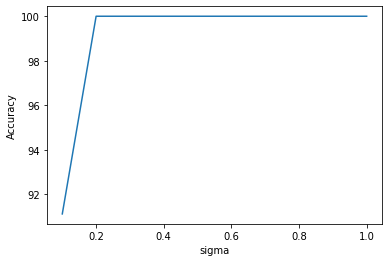

In [12]:
def main_gas(sigmaa):
    m, n = X.shape
    K = gaussian_kernel(X, X, sigmaa)
    P = matrix(np.matmul(y,y.T) * K)
    q = matrix(np.ones((m, 1)) * -1)
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))          
    G = matrix(np.eye(m) * -1)
    h = matrix(np.zeros(m))
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])
    ind = (alphas > 1e-4).flatten()
    sv = X[ind]
    sv_y = y[ind]
    alphas = alphas[ind]
    b = sv_y - np.sum(gaussian_kernel(sv, sv, sigmaa)* alphas * sv_y, axis=0)
    b = np.sum(b) / b.size
    RES = gaussian_kernel(sv, X_train, sigmaa)
    #print('look down')
    #print(RES)
    prod = np.sum(gaussian_kernel(sv, X_train, sigmaa)* alphas * sv_y, axis=0) + b
    #print(prod)
    predictions = np.sign(prod)
    #print(predictions)
    #print(y_train.T)
    acc = accuracy(y_train, predictions)
    #print(acc)
    return acc

#main()



sigmaa = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result = []
for i in sigmaa: 
    res = main_gas(i)
    result.append(res)
plt.xlabel("sigma")
plt.ylabel("Accuracy")
plt.plot(sigmaa, result)
print(result)
